In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Data Analyst/Project/Mental Health/Student Mental health.csv')

In [3]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [5]:
col = ['timestamp', 'gender', 'age', 'course', 'year', 'cgpa', 'is_married', 'is_depression', 'is_anxiety', 'is_panic', 'is_treatment']
data.rename(columns=dict(zip(data.columns, col)), inplace=True)
data.head()

,timestamp,gender,age,course,year,cgpa,is_married,is_depression,is_anxiety,is_panic,is_treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [6]:
print(data.isnull().sum().sum())
print(data.duplicated().sum().sum())

1
0


In [7]:
data['age'].fillna(data['age'].mean(), inplace=True)

In [8]:
data.isnull().sum().sum()

0

In [9]:
#get dummies categorical features
normalized_data = data.copy()
normalized_data["gender"] = normalized_data["gender"].apply(lambda x: 0 if x=="Male" else 1)
normalized_data["is_married"] = normalized_data["is_married"].apply(lambda x: 0 if x=="No" else 1)
normalized_data["is_depression"] = normalized_data["is_depression"].apply(lambda x: 0 if x=="No" else 1)
normalized_data["is_anxiety"] = normalized_data["is_anxiety"].apply(lambda x: 0 if x=="No" else 1)
normalized_data["is_panic"] = normalized_data["is_panic"].apply(lambda x: 0 if x=="No" else 1)
normalized_data["is_treatment"] = normalized_data["is_treatment"].apply(lambda x: 0 if x=="No" else 1)

In [10]:
display(normalized_data.head())

,timestamp,gender,age,course,year,cgpa,is_married,is_depression,is_anxiety,is_panic,is_treatment
0,8/7/2020 12:02,1,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,0,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,0,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,1,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,0,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0


In [11]:
normalized_data['year'] = normalized_data['year'].str.extract(r'(\d+)')
normalized_data.head()

,timestamp,gender,age,course,year,cgpa,is_married,is_depression,is_anxiety,is_panic,is_treatment
0,8/7/2020 12:02,1,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,0,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,0,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,1,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,0,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0


In [12]:
normalized_data['timestamp'] = normalized_data['timestamp'].str.split(' ', expand=True)[0]
normalized_data.head()

,timestamp,gender,age,course,year,cgpa,is_married,is_depression,is_anxiety,is_panic,is_treatment
0,8/7/2020,1,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020,0,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020,0,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020,1,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020,0,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0


In [13]:
normalized_data['cgpa'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [14]:
normalized_data['cgpa'] = normalized_data['cgpa'].str.strip()
print(normalized_data['cgpa'].unique())
normalized_data.head()

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


,timestamp,gender,age,course,year,cgpa,is_married,is_depression,is_anxiety,is_panic,is_treatment
0,8/7/2020,1,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020,0,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020,0,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020,1,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020,0,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0


In [15]:
normalized_data.describe()

,gender,age,is_married,is_depression,is_anxiety,is_panic,is_treatment
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.742574,20.530000,0.158416,0.346535,0.336634,0.326733,0.059406
std,0.439397,2.483767,0.366952,0.478239,0.474915,0.471358,0.237562
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,23.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Phân tích dữ liệu theo thống kê:

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'is_married'}>],
       [<Axes: title={'center': 'is_depression'}>,
        <Axes: title={'center': 'is_anxiety'}>,
        <Axes: title={'center': 'is_panic'}>],
       [<Axes: title={'center': 'is_treatment'}>, <Axes: >, <Axes: >]],
      dtype=object)

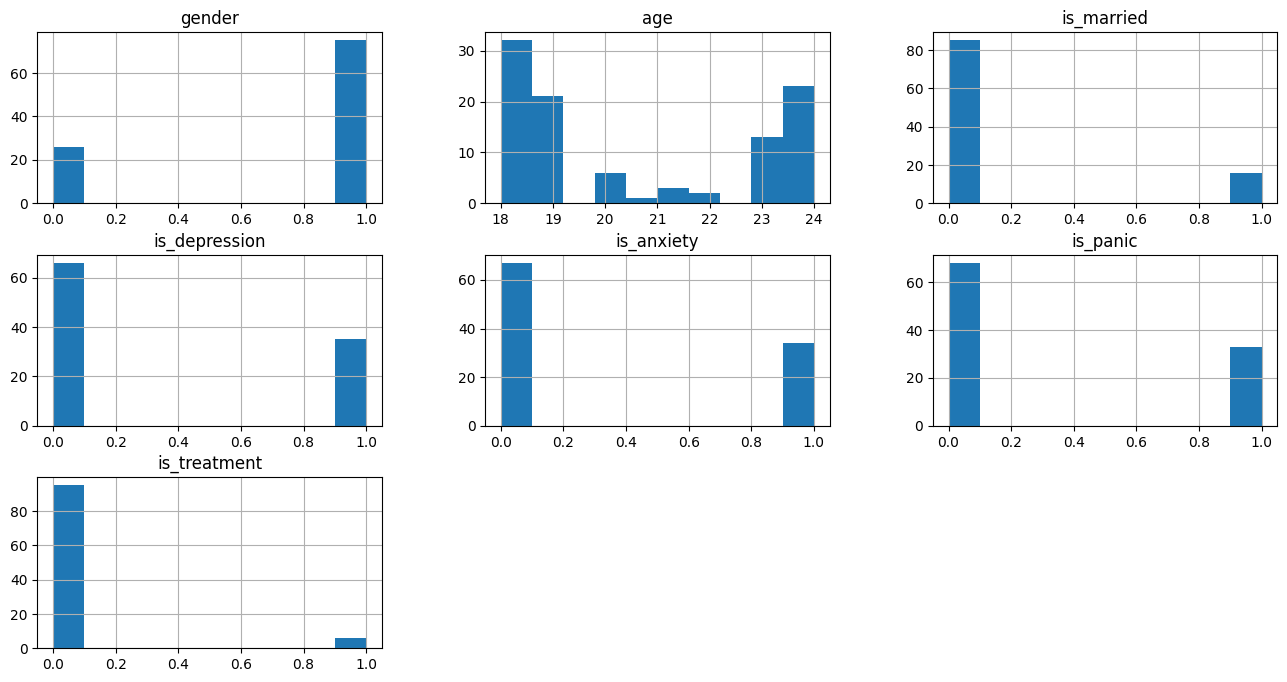

In [16]:
normalized_data.hist(figsize=(16,8))

In [17]:
sorted(normalized_data['timestamp'].unique())

['13/07/2020', '18/07/2020', '8/7/2020', '9/7/2020']

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

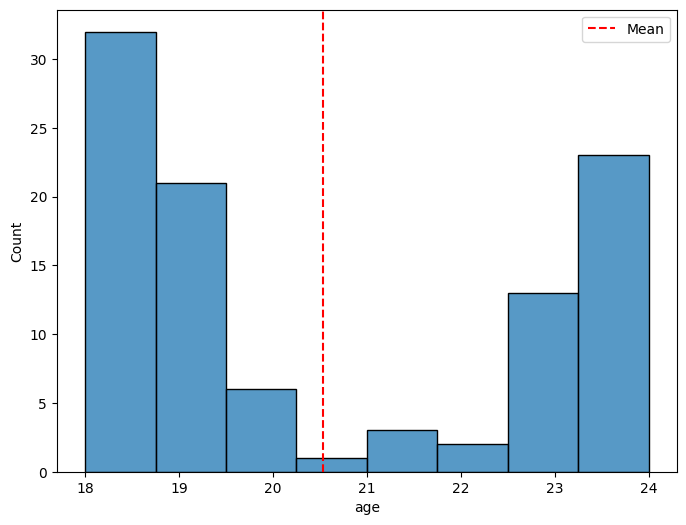

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(normalized_data['age'])
plt.axvline(normalized_data['age'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

Sinh viên năm mấy tham gia khảo sát nhiều nhất?

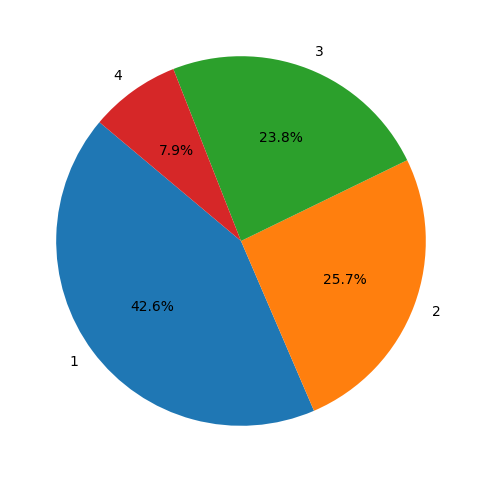

In [20]:
from matplotlib import pyplot as plt
year_count = normalized_data['year'].value_counts().sort_index()
year_percent = (year_count/year_count.sum())*100
plt.figure(figsize=(8, 6))
plt.pie(year_count, labels=year_percent.index, autopct='%1.1f%%', startangle=140)
plt.show()

Liệu năm học của sinh viên có gây áp lực đến họ?

In [21]:
panic_percent = (normalized_data[normalized_data['is_panic'] == 1].groupby('year').size() / year_count) * 100
panic_percent

year
1    32.558140
2    30.769231
3    41.666667
4    12.500000
dtype: float64

In [22]:
year_count

year
1    43
2    26
3    24
4     8
Name: count, dtype: int64

In [23]:
year_count = pd.DataFrame(year_count)
panic_percent = pd.DataFrame(panic_percent)
merged_df = pd.merge(year_count, panic_percent, how='inner', left_index=True, right_index=True)
merged_df

,count,0
year,,
1,43,32.558140
2,26,30.769231
3,24,41.666667
4,8,12.500000


In [24]:
gender_counts = normalized_data['gender'].value_counts()
gender_counts

gender
1    75
0    26
Name: count, dtype: int64

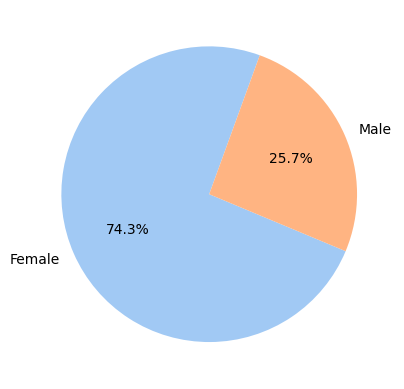

In [25]:
gender_counts = normalized_data['gender'].value_counts()
palette = sns.color_palette("pastel", len(gender_counts))
plt.pie(gender_counts, labels = ['Female', 'Male'], autopct='%1.1f%%', colors=palette, startangle=70)
plt.show()

In [26]:
gender_counts = pd.DataFrame(gender_counts)
gender_counts

,count
gender,
1,75
0,26


In [27]:
gender_panic = normalized_data[normalized_data['is_panic']==1]
gender_panic = pd.DataFrame(gender_panic.groupby(['gender'])[['is_panic']].count())
gender_panic = pd.merge(gender_panic, gender_counts, how='inner', left_index=True, right_index=True)
gender_panic['%Panic per Gender'] = (gender_panic['is_panic'] / gender_panic['count']) * 100
gender_panic['%Panic per Total'] = (gender_panic['is_panic'] / gender_panic['count'].sum()) * 100
gender_panic

,is_panic,count,%Panic per Gender,%Panic per Total
gender,,,,
0,8,26,30.769231,7.920792
1,25,75,33.333333,24.752475


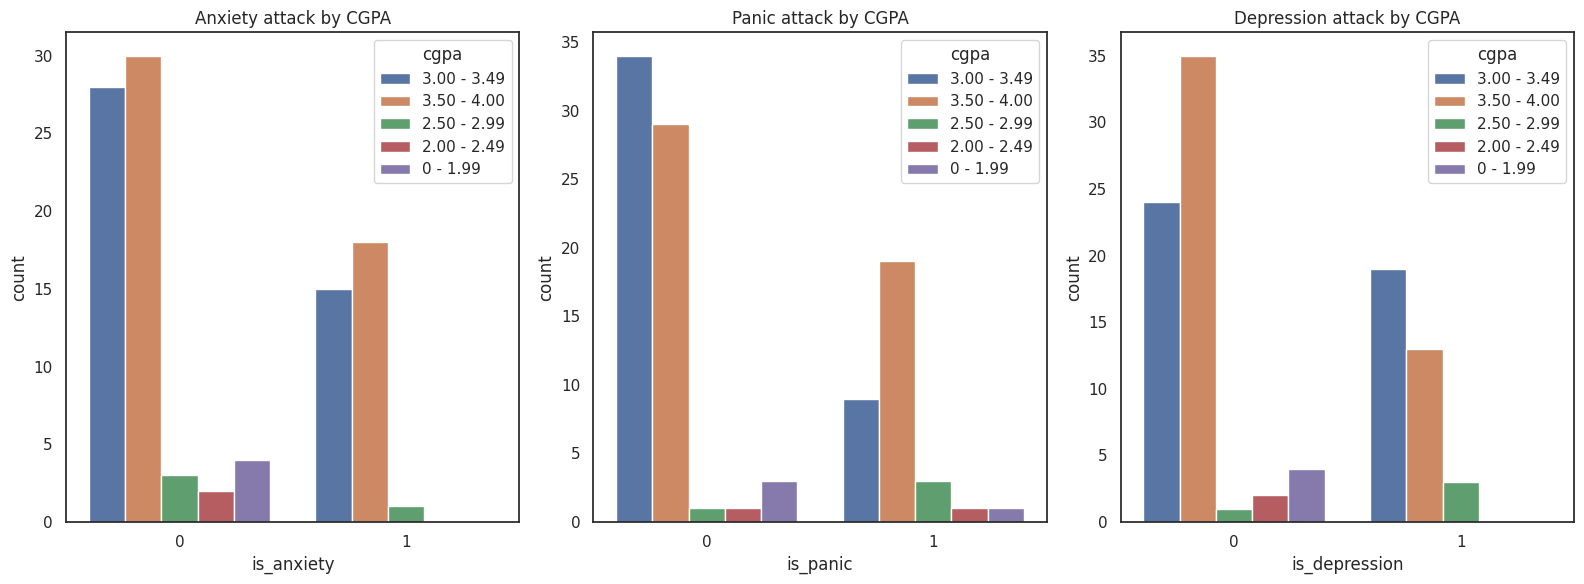

In [28]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="white")

plt.subplot(1, 3, 1)
sns.countplot(x='is_anxiety', hue='cgpa', data=normalized_data)
plt.title("Anxiety attack by CGPA")

plt.subplot(1, 3, 2)
sns.countplot(x='is_panic', hue='cgpa', data=normalized_data)
plt.title("Panic attack by CGPA")

plt.subplot(1, 3, 3)
sns.countplot(x='is_depression', hue='cgpa', data=normalized_data)
plt.title("Depression attack by CGPA")

plt.tight_layout()
plt.show()

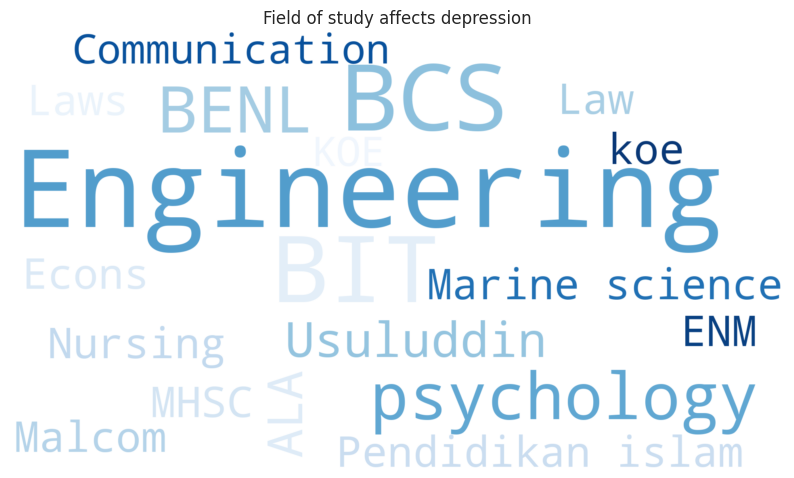

In [29]:
from wordcloud import WordCloud

course_panic_df = normalized_data[normalized_data['is_depression']==1]
course_panic_counts = course_panic_df.groupby('course')['is_depression'].sum().sort_values()
course_panic_counts

panic_counts_dict = course_panic_counts.to_dict()

wordcloud = WordCloud(background_color='white', colormap='Blues', width = 1920, height = 1080)
wordcloud.generate_from_frequencies(panic_counts_dict)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Field of study affects depression')
plt.axis('off')
plt.show()

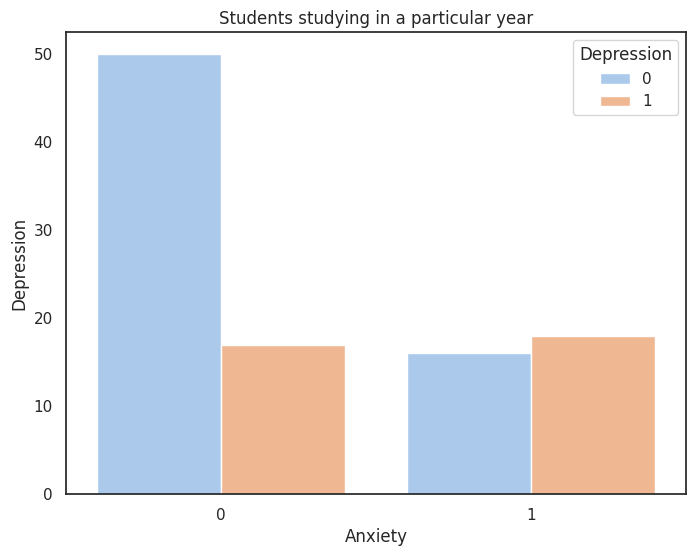

In [30]:
normalized_data_long = pd.melt(normalized_data, id_vars=['is_anxiety'], value_vars=['is_depression'], value_name='Depression')
plt.figure(figsize=(8, 6))
sns.countplot(data=normalized_data_long, x='is_anxiety', hue='Depression', palette='pastel')
plt.title("Students studying in a particular year")
plt.xlabel("Anxiety")
plt.ylabel("Depression")
plt.show()

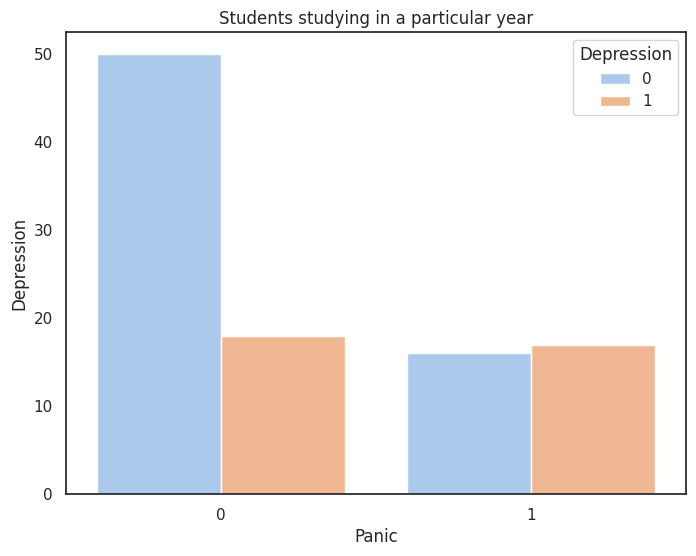

In [31]:
normalized_data_long = pd.melt(normalized_data, id_vars=['is_panic'], value_vars=['is_depression'], value_name='Depression')
plt.figure(figsize=(8, 6))
sns.countplot(data=normalized_data_long, x='is_panic', hue='Depression', palette='pastel')
plt.title("Students studying in a particular year")
plt.xlabel("Panic")
plt.ylabel("Depression")
plt.show()

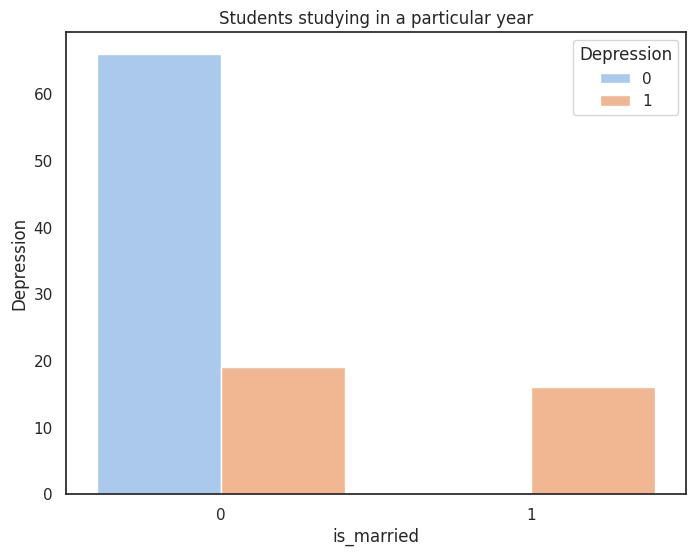

In [37]:
normalized_data_long = pd.melt(normalized_data, id_vars=['is_married'], value_vars=['is_depression'], value_name='Depression')
plt.figure(figsize=(8, 6))
sns.countplot(data=normalized_data_long, x='is_married', hue='Depression', palette='pastel')
plt.title("Students studying in a particular year")
plt.xlabel('is_married')
plt.ylabel("Depression")
plt.show()

In [ ]:
depression_count = len(normalized_data[normalized_data['is_depression']==1])

In [ ]:
((normalized_data[normalized_data['is_depression'] == 1]).groupby(['is_treatment']).size() / depression_count)*100

is_treatment
0    82.857143
1    17.142857
dtype: float64